In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow import keras
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import pickle
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn.preprocessing import Normalizer

2023-06-13 14:13:09.336169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.10.0


In [3]:
cd ..

/Users/hyakuzukamaya/Desktop/lab/judgement_system/script


## Loading a dataset

## Split into train data and test data as dataset
- データセットとして使用するデータを取得する。
- trainデータとtestデータに分割する。（例えば80%をtrainデータに、20%をtestデータに、など。）
- 書き方はデータセットとして使用するデータの type による。もし、numpy の形で持っているならhttps://www.tensorflow.org/tutorials/load_data/numpy?hl=ja が参考になります。

In [4]:


# x_path = '../../data/npy/x_random_l3_6.npy'
x_path = '../../data/npy/x_random_l3_6_dv.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l3.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l3_3.npy'

# y_path = '../../data/npy/y_random_l3_6.npy'
y_path = '../../data/npy/y_random_l3_6_dv.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l3.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l3_3.npy'

# l3
x_l3_mean_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_mean.npy')
x_l3_rb_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_rb.npy')
x_l3_dv_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_dv.npy')
x_l3_mean_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_mean_fullPath)
x_l3_rb_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_rb_fullPath)
x_l3_dv_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_dv_fullPath)

y_l3_mean_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_mean.npy')
y_l3_rb_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_rb.npy')
y_l3_dv_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_dv.npy')
y_l3_mean_path = tf.keras.utils.get_file('y_random_l3_6_mean.npy', 'file://'+y_l3_mean_fullPath)
y_l3_rb_path = tf.keras.utils.get_file('y_random_l3_6_mean.npy', 'file://'+y_l3_rb_fullPath)
y_l3_dv_path = tf.keras.utils.get_file('y_random_l3_6_mean.npy', 'file://'+y_l3_dv_fullPath)


x_data = np.load(x_l3_mean_path)
y_data = np.load(y_l3_mean_path, allow_pickle=True)

print(y_data)

print(len(y_data))

# min_val = y_data.min()
# max_val = y_data.max()

# y_data = (y_data - min_val)/(max_val - min_val)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

[81.75717984 71.65941225 73.36071694 74.59486076 74.18886587 75.28969818
 78.17905737 70.24666812 69.45891147 70.66928379 72.38153153 74.88615512
 74.62777576 75.44351163 70.57883192 76.96524603 78.86898754 79.62410297
 74.88469404 74.4852573  85.04752364 73.29088743 78.3877519  71.72864106
 71.36936091 75.3587049  80.3394017  74.96857571 78.40361308 71.74990286
 69.20528967 73.75640951 76.29530953 77.49812357 78.56903897 74.78537322
 77.54815098 74.43169559 74.2062597  73.18780943 71.23657538 68.70537632
 74.99379326 76.14412122 74.39047458 71.42879968 80.33096126 79.1146863
 72.99107749 78.73958767 63.5986374  78.00423104 71.06721523 78.27479096
 75.56486089 73.28142168 73.94396379 76.05046169 74.22902072 71.33532686
 78.73829771 81.84411629 76.72695433 71.96600068 69.74555463 71.55830513
 77.94871633 74.24648196 77.00629656 74.29311097 69.73287812 70.12018929
 69.98857063 76.66056971 80.84087478 77.71646308 76.36951913 79.11906634
 78.17817632 74.91454604 81.34373391 67.42934475 67.

## Set my model
- input_shape は入力データのサイズ。
- モデルの定義方法は調べればたくさん出てきますが、例えばここ： https://sinyblog.com/deaplearning/keras_how_to/ 
- 最後の層の出力は、期待する出力データのサイズ
- [model](https://github.com/si-tm/docs-l30n/blob/master/site/ja/tutorials/quickstart/beginner.py)

In [5]:
def build_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'), # units=128 : 出力空間の次元数
    tf.keras.layers.Dropout(0.2), # 入力にドロップアウトを適用する rate=0.2 : 入力ユニットをドロップする割合
    tf.keras.layers.Dense(1) 
    ])

    optimizer = tf.keras.optimizers.Adam() # optimizers も Adam 以外に色々種類があります。調べてみてください！

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) # loss 関数に何を採用するかはどんな問題を解きたいのかによります。
                                        #ここでは MSE を採用していますが、他にも色々な選択肢があります。調べてみてください！
    return model

In [6]:
model = build_model()

2023-06-13 14:13:22.080256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1728)              0         
                                                                 
 dense (Dense)               (None, 128)               221312    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 221,441
Trainable params: 221,441
Non-trainable params: 0
_________________________________________________________________


In [8]:
example_batch = x_train[:10]
print(example_batch.shape)
example_result = model.predict(example_batch)
# example_result

(10, 1728)
1/1 [==============================] - 0s 127ms/step


In [9]:
print(example_result)

[[-0.1338937 ]
 [ 0.01061916]
 [ 0.0356707 ]
 [ 0.01044368]
 [-0.02904498]
 [-0.01254198]
 [ 0.02227012]
 [-0.1618053 ]
 [-0.06516396]
 [-0.03254002]]


In [10]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 400 # epoch 数も考慮しよう
# EPOCHS = 100 # epoch 数も考慮しよう

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,21.418280,3.692335,21.418280,266.150391,13.915273,266.150391,395
396,19.983454,3.534326,19.983454,272.024902,14.081627,272.024902,396
397,19.738546,3.481585,19.738546,271.636536,14.075877,271.636536,397
398,20.140226,3.605774,20.140226,271.063812,14.058570,271.063812,398
399,20.699224,3.566602,20.699224,264.847626,13.866250,264.847626,399


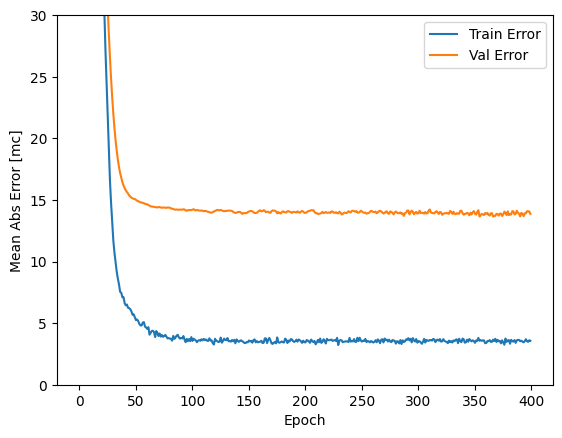

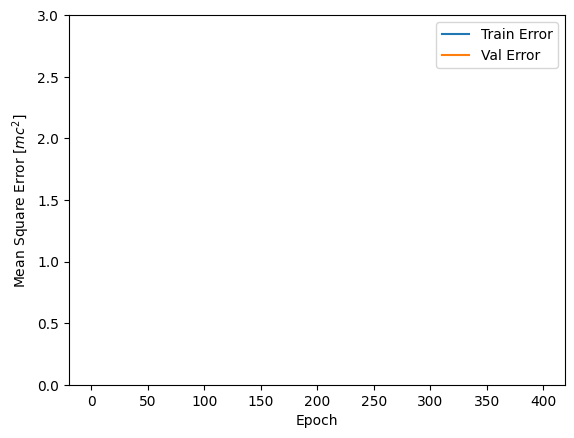

In [12]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [mc]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,30])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$mc^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,3])
    plt.legend()
    plt.show()


plot_history(history)

6/6 [==============================] - 0s 890us/step


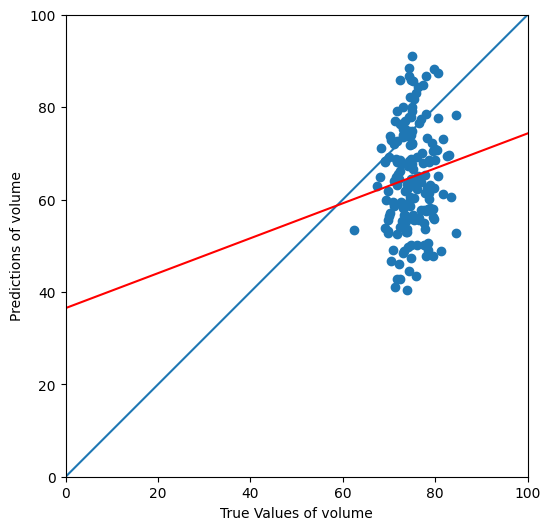

In [13]:
test_predictions = model.predict(x_test).flatten()
res = linregress( y_test, test_predictions)

plt.figure(figsize=(6,6))
plt.scatter(y_test, test_predictions)
# plt.xlabel('True Values [mc]')
# plt.ylabel('Predictions [mc]')
plt.xlabel('True Values of volume')
plt.ylabel('Predictions of volume')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,100])
plt.ylim([0,100])
_ = plt.plot([0,100], [0,100])

plt.plot([0,100], res.intercept + res.slope*np.array([0, 100]), 'r', label='fitted line')

# normalizer 学習前

In [14]:
# トレーニングした model をどこかで使用したいなら以下のようにモデルを保存する
model.save('../saved_model/l3_ave_230613')

INFO:tensorflow:Assets written to: ../saved_model/l3_ave_230613/assets


In [15]:
mse = tf.keras.losses.MeanSquaredError()

In [16]:
mse(y_test,test_predictions).numpy()

0.13129348

In [ ]:
test_predictions.rank